# Extracting text from PDF

## Method 1: using *pdfplumber* 
### (open-source library, but slow and not very precise)

In [1]:
import pdfplumber

In [2]:
# Open PDF file
pdf = pdfplumber.open("Input/The-lord-of-the-rings.eng.pdf")

In [3]:
# Get metadata
pdf.metadata

{'Author': 'J. R. R. Tolkien',
 'ModDate': "D:20100813200505+02'00'",
 'Producer': 'Acrobat Distiller 6.0 (Windows)',
 'Title': 'The Lord of the Rings',
 'EBX_PUBLISHER': 'HarperCollins',
 'SPDF': '1127',
 'Enhanced': 'By PDF Enhancer 3.5.6412/Unix',
 'Creator': 'Adobe Acrobat 9.0.0',
 'CreationDate': "D:20090523145628+05'30'"}

In [4]:
# Working with one sample page
page = pdf.pages[9]

In [5]:
# Get page data
print(f'Page number: {page.page_number}, Page width: {page.width}, Page height: {page.height}')

Page number: 10, Page width: 396, Page height: 612


In [8]:
# Additional page objects
print(f'In total this page contains {len(page.objects)} object(s), there are {len(page.images)} images, {len(page.curves)} curves and {len(page.lines)} lines.')

In total this page contains 1 object(s), there are 0 images, 0 curves and 0 lines.


In [9]:
# Extracting the pext from sample page
print(page.extract_text(x_tolerance=0.5))

viii T H E L O R D O F T H E R I N G S
unchanged for a decade. Tolkien had made a few small corrections,
but further errors entered The Fellowship of the Ring in its December
1954 second impression when the printer, having distributed the type
after the first printing, reset the book without informing the author
or publisher. These include misrepresentations of the original printed
text – that is, words and phrases that read acceptably in context,
but which depart from Tolkien’s wording as originally written and
published.
In 1965, stemming from what then appeared to be copyright prob-
lems in the United States, an American paperback firm published an
unauthorized and non-royalty-paying edition of The Lord of the Rings.
For this new edition by Ace Books the text of the narrative was reset,
thus introducing new typographical errors; the appendices, however,
were reproduced photographically from the hardcover edition, and
remain consistent with it.
Tolkien set to work on his first revisi

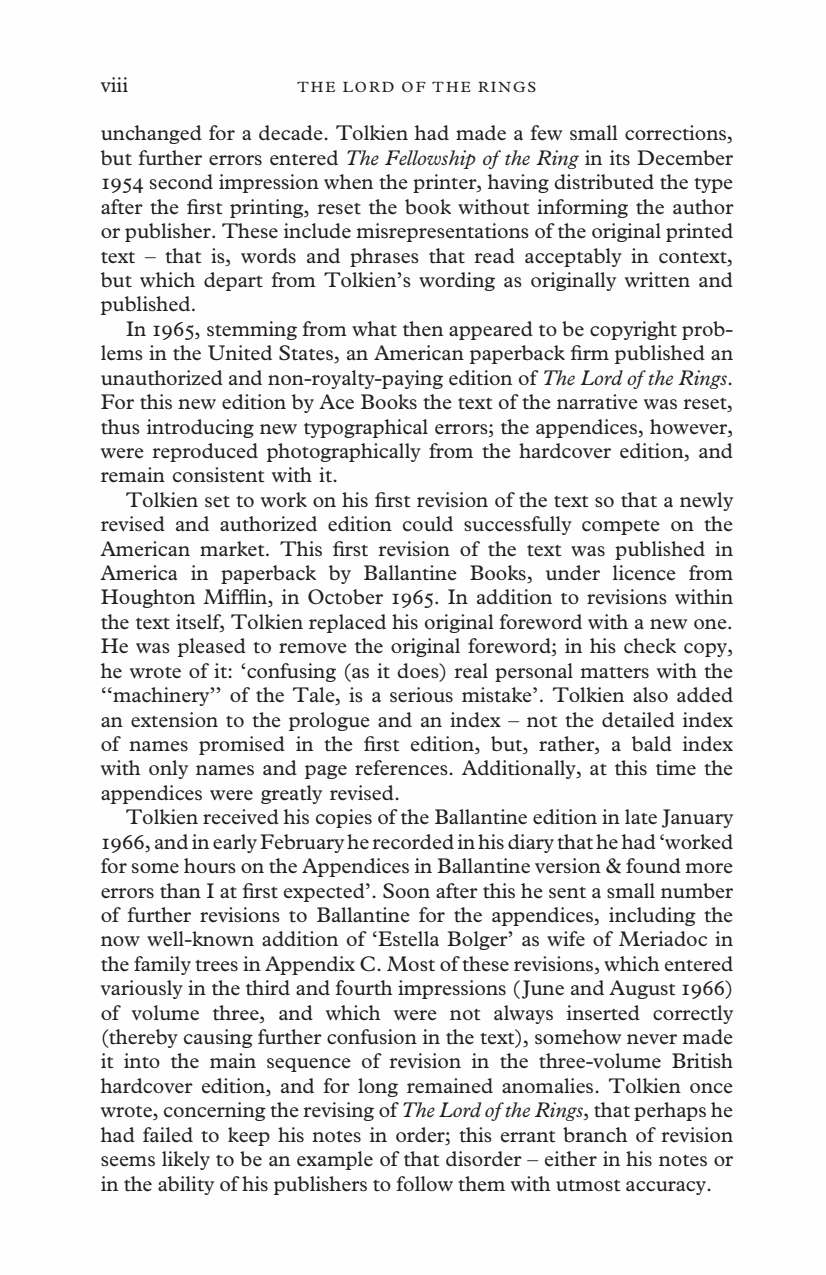

In [10]:
# Transform sample page into the PNG image (high quality)
page.to_image(resolution=150, antialias=True)

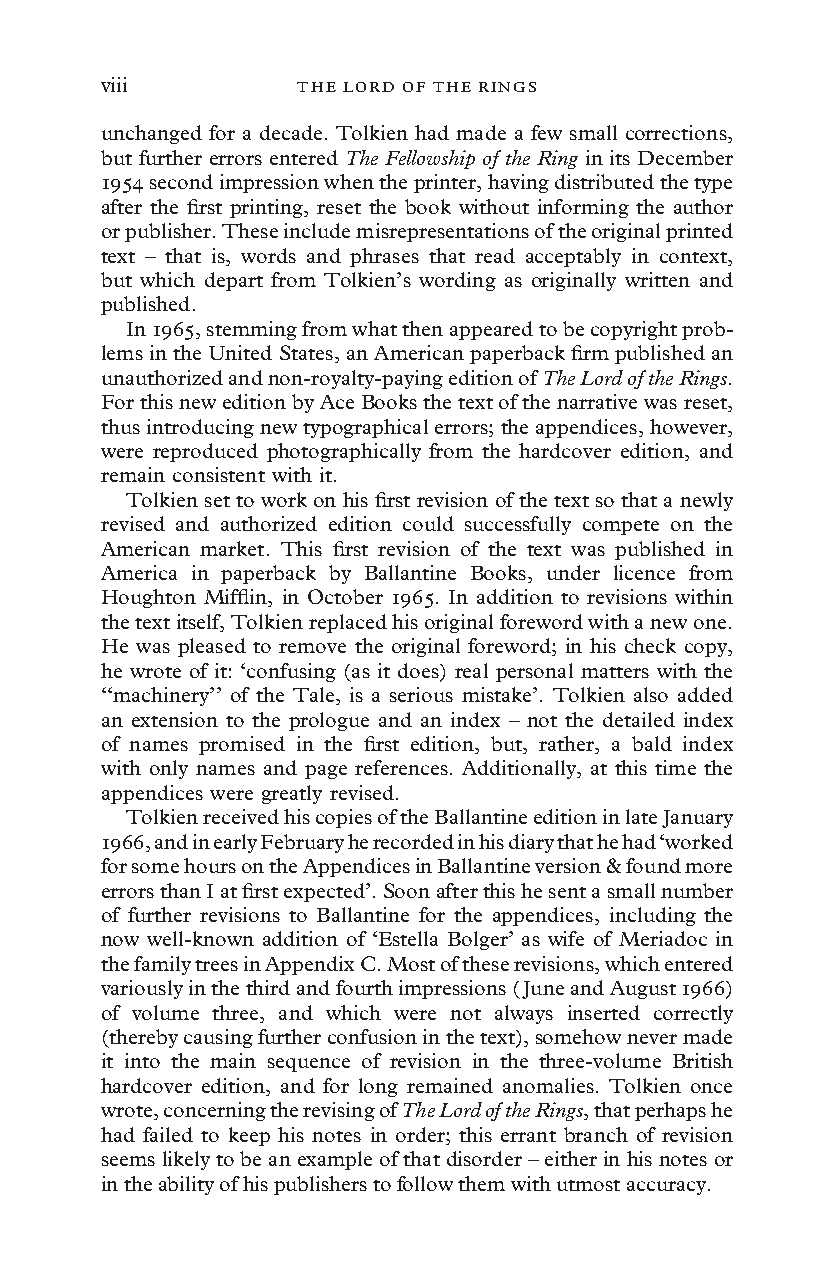

In [11]:
# Transform sample page into the PNG image (low quality, small file size)

page.to_image(resolution=150, antialias=False)

In [12]:
# Extracting words (generates a dictionary)
page.extract_words()

[{'text': 'viii',
  'x0': 48.27,
  'x1': 61.41739200000001,
  'top': 35.97386300000005,
  'doctop': 5543.973863,
  'bottom': 46.166863000000035,
  'upright': True,
  'direction': 1},
 {'text': 'THE',
  'x0': 142.6,
  'x1': 160.9023387,
  'top': 38.44754230000001,
  'doctop': 5546.4475423,
  'bottom': 45.58284230000004,
  'upright': True,
  'direction': 1},
 {'text': 'LO',
  'x0': 164.36,
  'x1': 175.9410803,
  'top': 38.44754230000001,
  'doctop': 5546.4475423,
  'bottom': 45.58284230000004,
  'upright': True,
  'direction': 1},
 {'text': 'RD',
  'x0': 176.958330211,
  'x1': 189.10898542200002,
  'top': 38.44754230000001,
  'doctop': 5546.4475423,
  'bottom': 45.58284230000004,
  'upright': True,
  'direction': 1},
 {'text': 'OF',
  'x0': 192.52,
  'x1': 204.001083811,
  'top': 38.44754230000001,
  'doctop': 5546.4475423,
  'bottom': 45.58284230000004,
  'upright': True,
  'direction': 1},
 {'text': 'THE',
  'x0': 207.41,
  'x1': 225.763521922,
  'top': 38.44754230000001,
  'doctop': 5

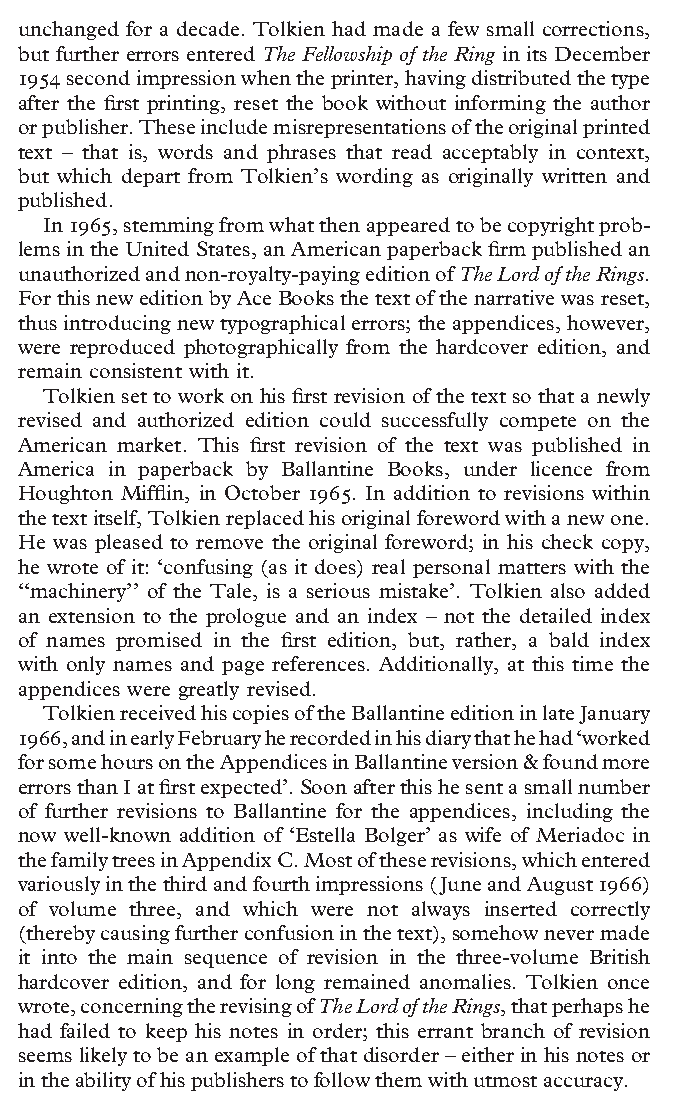

In [13]:
# Crop desired page area
page.crop((40,50, 370, 580)).to_image(resolution=150)

In [14]:
# Extracting the text from entire file, page by page
pages_dict = {}
for page in pdf.pages[44:1056]:
    cropped_page = page.crop((40,50, 370, 580))
    pages_dict[page.page_number] = cropped_page.extract_text() + '\n'

In [15]:
# Validation - read one page
pages_dict[80]

'mean; and as long as it stayed with him he would never leave his\ndeep pool again. So now, when its master was awake once more and\nsending out his dark thought from Mirkwood, it abandoned Gollum.\nOnly to be picked up by the most unlikely person imaginable: Bilbo\nfrom the Shire!\n‘Behind that there was something else at work, beyond any design\nof the Ring-maker. I can put it no plainer than by saying that Bilbo\nwas meant to find the Ring, and not by its maker. In which case you\nalso were meant to have it. And that may be an encouraging thought.’\n‘It is not,’ said Frodo. ‘Though I am not sure that I understand\nyou. But how have you learned all this about the Ring, and about\nGollum? Do you really know it all, or are you just guessing still?’\nGandalf looked at Frodo, and his eyes glinted. ‘I knew much and\nI have learned much,’ he answered. ‘But I am not going to give an\naccount of all my doings to you. The history of Elendil and Isildur\nand the One Ring is known to all the Wi

In [16]:
# Text export to JSON file (one page = one record)
import json
with open('Output/The-lord-of-the-rings.pdfplumber.json', "w") as output_file:
    json.dump(pages_dict, output_file, sort_keys=True, indent=4)


In [17]:
pdf.close()

## Method 2: using PyMuPDF
### (proprietary library with some use restrictions: very fast, but not very reliable)

In [1]:
# import PyMuPDF
import fitz

In [101]:
pdf_2 =  fitz.open("Input/The-lord-of-the-rings.eng.pdf")

In [102]:
# Total number of pages
pdf_2.page_count

1210

In [103]:
# Get metadata
pdf_2.metadata

{'format': 'PDF 1.5',
 'title': 'The Lord of the Rings',
 'author': 'J. R. R. Tolkien',
 'subject': '',
 'keywords': '',
 'creator': 'Adobe Acrobat 9.0.0',
 'producer': 'Acrobat Distiller 6.0 (Windows)',
 'creationDate': "D:20090523145628+05'30'",
 'modDate': "D:20100813200505+02'00'",
 'trapped': '',
 'encryption': None}

In [104]:
# get Table of Content
pdf_2.get_toc()

[[1, 'Cover Image', 1],
 [1, 'Title Page', 3],
 [1, 'Contents', 5],
 [2, 'Note on the Text', 9],
 [2, 'Note on the 50th Anniversary Edition', 16],
 [2, 'Foreword to the Second Edition', 20],
 [2, 'Prologue', 25],
 [2, 'The Fellowship of the Ring', 41],
 [2, 'Book One', 43],
 [3, 'Chapter One: A Long-expected Party', 45],
 [3, 'Chapter Two: The Shadow of the Past', 66],
 [3, 'Chapter Three: Three is Company', 89],
 [3, 'Chapter Four: A Short Cut to Mushrooms', 110],
 [3, 'Chapter Five: A Conspiracy Unmasked', 122],
 [3, 'Chapter Six: The Old Forest', 133],
 [3, 'Chapter Seven: In the House of tom Bombadil', 147],
 [3, 'Chapter Eight: Fog on the Barrow-downs', 159],
 [3, 'Chapter Nine: At the Sign of the Prancing Pony', 173],
 [3, 'Chapter Ten: Strider', 187],
 [3, 'Chapter Eleven: A Knife In the Dark', 200],
 [3, 'Chapter Twelve: Flight to the Ford', 221],
 [2, 'Book Two', 241],
 [3, 'Chapter One: Many Meetings', 243],
 [3, 'Chapter Two: The Council of Elrond', 263],
 [3, 'Chapter Three

In [105]:
# Define page range (as generator object)
pdf_2.pages(15,25)

<generator object Document.pages at 0x7fb0a4219bd0>

In [106]:
# Load one sample page
page = pdf_2[13]

In [107]:
# Get page attributes 
print(f'Page number: {page.number}, page boundaries {page.bound()}')

Page number: 13, page boundaries Rect(0.0, 0.0, 396.0, 612.0)


In [108]:
# Convert page to Pixmap image
imx = page.get_pixmap()

# Save pixmap image as PNG 
imx.save("Output/page-%i.png" % page.number)

In [109]:
# Crop the page
page.set_cropbox(fitz.Rect(40,50, 370, 580))
page.get_pixmap().save("Output/page_crop-%i.png" % page.number)

In [110]:
page.get_text('text', 
           flags=fitz.TEXT_INHIBIT_SPACES
                 )

'TH E L ORD OF THE RI NGS \nChristopher Tolkien reproduces a page from the first manuscript of \nthe chapter ‘The Taming of Sme´agol’, and the printed text corre-\nsponding to this text is on the facing page (see pp. 90–91). One is \nastonished at anyone’s ability to decipher such texts. \nThat difficulty aside, just what do these books signify to ordinary \nreaders and to Tolkien scholars? And what is ‘the history of the \nwriting’ of a book? Simply, these volumes show in great detail the \ndevelopment of the story of The Lord of the Rings from its very earliest \ndrafts and hasty projections through its completion. We see in the \nearliest materials what is very much a children’s book, a sequel to \nThe Hobbit, and as the story grows through various ‘phases’, there is \nan increase in seriousness and depth. We see alternate branches of \ndevelopment, the gradual blending and merging of certain characters, \nand the slow emergence of the nature of the rings and of the motiv-\nations o

In [111]:
page.get_textpage(clip = fitz.Rect(0, 0, 396, 612)).extractText()

'Christopher Tolkien reproduces a page from the first manuscript of \nthe chapter ‘The Taming of Sme´agol’, and the printed text corre-\nsponding to this text is on the facing page (see pp. 90–91). One is \nastonished at anyone’s ability to decipher such texts. \nThat difficulty aside, just what do these books signify to ordinary \nreaders and to Tolkien scholars? And what is ‘the history of the \nwriting’ of a book? Simply, these volumes show in great detail the \ndevelopment of the story of The Lord of the Rings from its very earliest \ndrafts and hasty projections through its completion. We see in the \nearliest materials what is very much a children’s book, a sequel to \nThe Hobbit, and as the story grows through various ‘phases’, there is \nan increase in seriousness and depth. We see alternate branches of \ndevelopment, the gradual blending and merging of certain characters, \nand the slow emergence of the nature of the rings and of the motiv-\nations of other characters. Some of

In [112]:
# Save all objects as dictionary
page.get_text('dict')

{'width': 330.0,
 'height': 530.0,
 'blocks': [{'number': 0,
   'type': 0,
   'bbox': (102.60000610351562,
    -12.258881568908691,
    219.9607696533203,
    -4.224534034729004),
   'lines': [{'spans': [{'size': 7.129197120666504,
       'flags': 4,
       'font': 'Plantin',
       'color': 2301728,
       'ascender': 0.9079999923706055,
       'descender': -0.2160000056028366,
       'text': 'TH',
       'origin': (102.60000610351562, -5.780029296875),
       'bbox': (102.60000610351562,
        -12.258881568908691,
        115.11393737792969,
        -4.238804340362549)},
      {'size': 7.129197120666504,
       'flags': 4,
       'font': 'Times-Roman',
       'color': 2301728,
       'ascender': 0.8980000019073486,
       'descender': -0.21799999475479126,
       'text': ' ',
       'origin': (116.1300048828125, -5.780029296875),
       'bbox': (116.1300048828125,
        -12.187528610229492,
        117.91078186035156,
        -4.224534034729004)},
      {'size': 7.129197120666504

In [116]:
# Extracting the text from entire book, page by page (without Foreword nor Appendices)
pages_dict = {}

for page in pdf_2.pages(44, 1056):
    pages_dict[page.number + 1 ] = page.get_textpage(clip = fitz.Rect(10, 10, 396, 612)).extractText()

In [117]:
# Output validation
pages_dict[88]

'64 \nTH E L ORD OF THE RI NGS \n‘I did, sir. And that’s why I choked: which you heard seemingly. \nI tried not to, sir, but it burst out of me: I was so upset.’ \n‘It can’t be helped, Sam,’ said Frodo sadly. He had suddenly \nrealized that flying from the Shire would mean more painful partings \nthan merely saying farewell to the familiar comforts of Bag End. ‘I \nshall have to go. But’ – and here he looked hard at Sam – ‘if you \nreally care about me, you will keep that dead secret. See? If you don’t, \nif you even breathe a word of what you’ve heard here, then I hope \nGandalf will turn you into a spotted toad and fill the garden full of \ngrass-snakes.’ \nSam fell on his knees, trembling. ‘Get up, Sam!’ said Gandalf. ‘I \nhave thought of something better than that. Something to shut your \nmouth, and punish you properly for listening. You shall go away with \nMr. Frodo!’ \n‘Me, sir!’ cried Sam, springing up like a dog invited for a walk. \n‘Me go and see Elves and all! Hooray!’ he 

In [96]:
# Text export to JSON file (one page = one record)
import json
with open('Output/The-lord-of-the-rings.pyMuPDF.json', "w") as output_file:
    json.dump(pages_dict, output_file, sort_keys=True, indent=4)

In [97]:
pdf_2.close()